<a href="https://colab.research.google.com/github/bendavidsteel/trade-democratization/blob/master/trade_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import itertools
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams

rcParams['figure.figsize'] = 12, 6

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In this project we will be linking the [V-Dem dataset](https://www.v-dem.net/en) and the [CEPII Trade History dataset](http://www.cepii.fr/cepii/en/bdd_modele/bdd.asp) into a time series graph dataset, in an attempt to investigate how bilateral trade affects the democratization of nations over time.

In [3]:
dataset_path = os.path.join('/', 'content', 'drive', 'My Drive', 'projects', 'trade_democratization', 'dataset')
# here we load the democracy indices from the V-Dem dataset
vdem_nodes = pd.read_csv(os.path.join(dataset_path, "V-Dem-CY-Core-v10.csv"))
vdem_nodes.head()

,country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,codingstart_contemp,codingend_contemp,codingstart_hist,codingend_hist,gapstart1,gapstart2,gapstart3,gapend1,gapend2,gapend3,COWcode,v2x_polyarchy,v2x_polyarchy_codelow,v2x_polyarchy_codehigh,v2x_polyarchy_sd,v2x_libdem,v2x_libdem_codelow,v2x_libdem_codehigh,v2x_libdem_sd,v2x_partipdem,v2x_partipdem_codelow,v2x_partipdem_codehigh,v2x_partipdem_sd,v2x_delibdem,v2x_delibdem_codelow,v2x_delibdem_codehigh,v2x_delibdem_sd,v2x_egaldem,v2x_egaldem_codelow,v2x_egaldem_codehigh,...,v2x_EDcomp_thick,v2x_EDcomp_thick_codelow,v2x_EDcomp_thick_codehigh,v2x_EDcomp_thick_sd,v2x_freexp,v2x_freexp_codelow,v2x_freexp_codehigh,v2x_freexp_sd,v2x_hosabort,v2x_hosinter,v2x_legabort,v2xcl_disc,v2xcl_disc_codelow,v2xcl_disc_codehigh,v2xcl_disc_sd,v2xcl_dmove,v2xcl_dmove_codelow,v2xcl_dmove_codehigh,v2xcl_dmove_sd,v2xcl_slave,v2xcl_slave_codelow,v2xcl_slave_codehigh,v2xcl_slave_sd,v2xel_elecparl,v2xel_elecpres,v2xex_elecleg,v2xlg_leginter,v2xme_altinf,v2xme_altinf_codelow,v2xme_altinf_codehigh,v2xme_altinf_sd,v2xps_party,v2xps_party_codelow,v2xps_party_codehigh,v2x_divparctrl,v2x_feduni,v2xca_academ,v2xca_academ_codelow,v2xca_academ_codehigh,v2xca_academ_sd
0,Mexico,MEX,3,1789,1789-12-31,1,1,Viceroyalty of New Spain,1088,2019,1900.0,2019.0,1789.0,1920.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,0.031,0.021,0.039,0.01,0.043,0.029,0.055,0.013,0.008,0.001,0.012,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.006,0.002,0.008,0.007,0.175,0.096,0.277,0.644,0.0,0.0,0.0,0.115,0.07,0.201,0.631,0.385,0.265,0.524,0.64,0.064,0.03,0.125,0.645,0,0,0.0,0.0,0.134,0.064,0.244,0.659,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,Mexico,MEX,3,1790,1790-12-31,1,1,Viceroyalty of New Spain,1088,2019,1900.0,2019.0,1789.0,1920.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,0.031,0.021,0.039,0.01,0.040,0.021,0.051,0.014,0.008,0.001,0.012,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.006,0.002,0.008,0.007,0.175,0.096,0.277,0.644,0.0,0.0,0.0,0.115,0.07,0.201,0.631,0.385,0.265,0.524,0.64,0.064,0.03,0.125,0.645,0,0,0.0,0.0,0.134,0.064,0.244,0.659,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,Mexico,MEX,3,1791,1791-12-31,1,1,Viceroyalty of New Spain,1088,2019,1900.0,2019.0,1789.0,1920.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,0.031,0.021,0.039,0.01,0.040,0.021,0.051,0.014,0.008,0.001,0.012,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.006,0.002,0.008,0.007,0.175,0.096,0.277,0.644,0.0,0.0,0.0,0.115,0.07,0.201,0.631,0.385,0.265,0.524,0.64,0.064,0.03,0.125,0.645,0,0,0.0,0.0,0.134,0.064,0.244,0.659,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,Mexico,MEX,3,1792,1792-12-31,1,1,Viceroyalty of New Spain,1088,2019,1900.0,2019.0,1789.0,1920.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,0.031,0.021,0.039,0.01,0.040,0.021,0.051,0.014,0.008,0.001,0.012,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.006,0.002,0.008,0.007,0.175,0.096,0.277,0.644,0.0,0.0,0.0,0.115,0.07,0.201,0.631,0.385,0.265,0.524,0.64,0.064,0.03,0.125,0.645,0,0,0.0,0.0,0.134,0.064,0.244,0.659,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,Mexico,MEX,3,1793,1793-12-31,1,1,Viceroyalty of New Spain,1088,2019,1900.0,2019.0,1789.0,1920.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,0.031,0.021,0.039,0.01,0.040,0.021,0.051,0.014,0.008,0.001,0.012,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.006,0.002,0.008,0.007,0.175,0.096,0.277,0.644,0.0,0.0,0.0,0.115,0.07,0.201,0.631,0.385,0.265,0.524,0.64,0.064,0.03,0.125,0.645,0,0,0.0,0.0,0.134,0.064,0.244,0.659,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [4]:
# now we load the time invariant bilateral data from the CEPII TradHist dataset
tradhist_timeinvar = pd.read_excel(os.path.join(dataset_path, "TRADHIST_GRAVITY_BILATERAL_TIME_INVARIANT.xlsx"))
tradhist_timeinvar.head()

,iso_o,iso_d,Distw,Dist_coord,Evercol,Comlang,Contig
0,2SICIL,AUTHUN,NaN,837.066180,0,0,0
1,2SICIL,BEL,NaN,1349.682430,0,0,0
2,2SICIL,CHL,NaN,11978.672481,0,0,0
3,2SICIL,ESP,NaN,1514.852764,0,0,0
4,2SICIL,FRA,NaN,1291.794085,0,0,0


In [5]:
# then load the three files that constitute the bilateral historical non trade related data such as distances between countries and colonial status
tradhist_timevar_frames = []
for idx in range(1, 4):
    tradhist_timevar_frames.append(pd.read_excel(os.path.join(dataset_path, "TRADHIST_GRAVITY_BILATERAL_TIME_VARIANT_{}.xlsx".format(idx))))
tradhist_timevar = pd.concat(tradhist_timevar_frames)
tradhist_timevar.head()

,iso_o,iso_d,year,SeaDist_SHRT,SeaDist_2CST,Curcol,Metro,Colo
0,2SICIL,AUTHUN,1838,1790.884033,1790.884033,0,NaN,NaN
1,2SICIL,BEL,1834,4463.319824,4463.319824,0,NaN,NaN
2,2SICIL,BEL,1835,4463.319824,4463.319824,0,NaN,NaN
3,2SICIL,BEL,1836,4463.319824,4463.319824,0,NaN,NaN
4,2SICIL,BEL,1837,4463.319824,4463.319824,0,NaN,NaN


In [6]:
tradhist_bitrade_frames = []
for idx in range(1, 4):
    tradhist_bitrade_frames.append(pd.read_excel(os.path.join(dataset_path, "TRADHIST_BITRADE_BITARIFF_{}.xlsx".format(idx))))
tradhist_bitrade = pd.concat(tradhist_bitrade_frames)
tradhist_bitrade.head()

,iso_o,iso_d,year,FLOW,FLOW_0,SOURCE_TF,BITARIFF
0,2SICIL,AUTHUN,1838,492920.687500,NaN,RIC_IP,NaN
1,2SICIL,BEL,1834,38164.500000,NaN,RIC_IP,NaN
2,2SICIL,BEL,1835,30052.339844,NaN,RIC_IP,NaN
3,2SICIL,BEL,1836,44906.539062,NaN,RIC_IP,NaN
4,2SICIL,BEL,1837,33957.269531,NaN,RIC_IP,NaN


Previous studies how shown that geographical closeness and colonizer/colony status affects the diffusion of democracy. It seems likely following from this that trade would result in some democratization diffusion effect also.

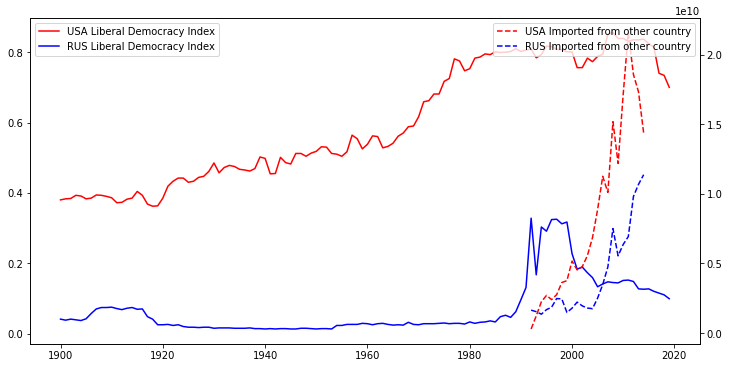

In [18]:
countries = ['USA', 'RUS']
colours = ['r', 'b']

# get high level indicators of democracy
ctry_demind = {}
for country in countries:
    vdem_cty = vdem_nodes[vdem_nodes['country_text_id'] == country]
    vdem_cty_key = vdem_cty[vdem_cty['year'] >= vdem_cty['codingstart_contemp']][['year', 'v2x_libdem']]
    ctry_demind[country] = vdem_cty_key.values

# get imports of one country from the other
ctry_trade = {}
for pair in itertools.permutations(countries):
    bilat = tradhist_bitrade[(tradhist_bitrade['iso_o'] == pair[0]) & (tradhist_bitrade['iso_d'] == pair[1])][['year', 'FLOW']]
    ctry_trade[pair[1]] = bilat.values

# plot the data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for country_idx in range(len(countries)):
    country = countries[country_idx]
    ax1.plot(ctry_demind[country][:, 0], ctry_demind[country][:, 1], colours[country_idx] + '-', label=country + " Liberal Democracy Index")
    ax2.plot(ctry_trade[country][:, 0], ctry_trade[country][:, 1], colours[country_idx] + '--', label=country + " Imported from other country")

ax1.legend(loc = "upper left")
ax2.legend(loc = "upper right")
plt.show()

We can see from this chart that the while the CEPII Trade History dataset is extensive, it still has notable holes. We would expect trade relationships between the US and Russia over the 20th century to be critical data in learning how regimes change, and this prompted a search for another trade history dataset to combine with the original for more coverage. 

Trade datasets generally have marked differences for the same data, but hopefully this drop in accuracy will be made up for with the larger amount of data.

We will be using the [Correlates of War historical trade dataset](https://correlatesofwar.org/data-sets/bilateral-trade).

In [8]:
cow_dyadic = pd.read_csv(os.path.join(dataset_path, "Dyadic_COW_4.0.csv"))
cow_dyadic.head()

,ccode1,ccode2,year,importer1,importer2,flow1,flow2,smoothflow1,smoothflow2,smoothtotrade,spike1,spike2,dip1,dip2,trdspike,tradedip,bel_lux_alt_flow1,bel_lux_alt_flow2,china_alt_flow1,china_alt_flow2,source1,source2,version
0,2,20,1920,United States of America,Canada,611.85999,735.47998,611.85999,735.47998,1347.34000,0,0,0,0,0,0,-9.0,-9.0,-9.0,-9.0,1.0,1.0,4
1,2,20,1921,United States of America,Canada,335.44000,442.98999,335.44000,442.98999,778.42999,0,0,0,0,0,0,-9.0,-9.0,-9.0,-9.0,1.0,1.0,4
2,2,20,1922,United States of America,Canada,364.01999,502.84000,364.01999,502.84000,866.85999,0,0,0,0,0,0,-9.0,-9.0,-9.0,-9.0,1.0,1.0,4
3,2,20,1923,United States of America,Canada,416.00000,598.14001,416.00000,598.14001,1014.14000,0,0,0,0,0,0,-9.0,-9.0,-9.0,-9.0,1.0,1.0,4
4,2,20,1924,United States of America,Canada,399.14001,496.32001,399.14001,496.32001,895.46002,0,0,0,0,0,0,-9.0,-9.0,-9.0,-9.0,1.0,1.0,4


In [9]:
cow_national = pd.read_csv(os.path.join(dataset_path, "National_COW_4.0.csv"))
cow_national.head()

,ccode,statename,stateabb,year,imports,exports,alt_imports,alt_exports,source1,source2,version
0,2,United States of America,USA,1870,450.000000,418.000000,NaN,NaN,1.0,1.0,4
1,2,United States of America,USA,1871,534.000000,475.000000,NaN,NaN,1.0,1.0,4
2,2,United States of America,USA,1872,632.000000,474.000000,NaN,NaN,1.0,1.0,4
3,2,United States of America,USA,1873,342.029999,626.590027,NaN,NaN,1.0,1.0,4
4,2,United States of America,USA,1874,576.000000,619.000000,NaN,NaN,1.0,1.0,4


In [17]:
cow_codes = pd.read_csv(os.path.join(dataset_path, "COW country codes.csv"))
cow_codes.head()

,StateAbb,CCode,StateNme
0,USA,2,United States of America
1,CAN,20,Canada
2,BHM,31,Bahamas
3,CUB,40,Cuba
4,CUB,40,Cuba


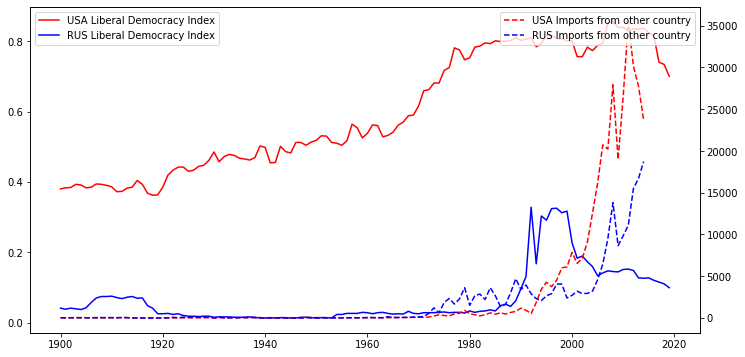

In [23]:
countries = ['USA', 'RUS']
colours = ['r', 'b']

# get high level indicators of democracy
ctry_demind = {}
for country in countries:
    vdem_cty = vdem_nodes[vdem_nodes['country_text_id'] == country]
    vdem_cty_key = vdem_cty[vdem_cty['year'] >= vdem_cty['codingstart_contemp']][['year', 'v2x_libdem']]
    ctry_demind[country] = vdem_cty_key.values

# get bilateral trade between the countries
ctry_trade = {}
country_code_0 = cow_codes[cow_codes['StateAbb'] == countries[0]]['CCode'].values[0]
country_code_1 = cow_codes[cow_codes['StateAbb'] == countries[1]]['CCode'].values[0]
ctry_trade[countries[0]] = cow_dyadic[(cow_dyadic['ccode1'] == country_code_0) & (cow_dyadic['ccode2'] == country_code_1) & (cow_dyadic['year'] >= 1900)][['year', 'flow1']].values
ctry_trade[countries[1]] = cow_dyadic[(cow_dyadic['ccode1'] == country_code_0) & (cow_dyadic['ccode2'] == country_code_1) & (cow_dyadic['year'] >= 1900)][['year', 'flow2']].values

# plot the data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for country_idx in range(len(countries)):
    country = countries[country_idx]
    ax1.plot(ctry_demind[country][:, 0], ctry_demind[country][:, 1], colours[country_idx] + '-', label=country + " Liberal Democracy Index")
    ax2.plot(ctry_trade[country][:, 0], ctry_trade[country][:, 1], colours[country_idx] + '--', label=country + " Imports from other country")

ax1.legend(loc = "upper left")
ax2.legend(loc = "upper right")
plt.show()

These figures show us that normalising the trade data will be important to prevent any relationships being overshadowed by GDP growth, even if GDP growth will likely be another key factor that affects democratization. A reasonable combination of these factors will be to have aggregate trade per country as a node feature, and country imports normalised by country aggregate imports be an edge feature.

In [12]:
print("{} trade observations in CEPII dataset, {} trade observations in CoW dataset".format(len(tradhist_bitrade), len(cow_dyadic)))

2495357 trade observations in CEPII dataset, 886828 trade observations in CoW dataset


The CoW dataset clearly has fewer trade observations than the CEPII dataset, but as we will only be running predictions from 1900 onwards, the longer running CEPII dataset will likely contain fewer relevant observations. The choice of 1900 is because this is noted as a point of a jump of accuracy in the observations in each dataset.

We now need to find a way of linking the two datasets. The trade history dataset judging by the column name seems to use the ISO country codes. However the V-Dem dataset seems to have its own country numbering system, and the three letter shortened name isn't specified in the reference manual to be the ISO name. 

In [10]:
vdem_nodes['country_text_id'].unique()

array(['MEX', 'SUR', 'SWE', 'CHE', 'GHA', 'ZAF', 'JPN', 'MMR', 'RUS',
       'ALB', 'EGY', 'YEM', 'COL', 'POL', 'BRA', 'USA', 'PRT', 'SLV',
       'YMD', 'BGD', 'BOL', 'HTI', 'HND', 'MLI', 'PAK', 'PER', 'SEN',
       'SSD', 'SDN', 'VNM', 'VDR', 'AFG', 'ARG', 'ETH', 'IND', 'KEN',
       'PRK', 'KOR', 'XKX', 'LBN', 'NGA', 'PHL', 'TZA', 'TWN', 'THA',
       'UGA', 'VEN', 'BEN', 'BTN', 'BFA', 'KHM', 'IDN', 'MOZ', 'NPL',
       'NIC', 'NER', 'ZMB', 'ZWE', 'GIN', 'CIV', 'MRT', 'CAN', 'AUS',
       'BWA', 'BDI', 'CPV', 'CAF', 'CHL', 'CRI', 'TLS', 'ECU', 'FRA',
       'DEU', 'GTM', 'IRN', 'IRQ', 'IRL', 'ITA', 'JOR', 'LVA', 'LSO',
       'LBR', 'MWI', 'MDV', 'MNG', 'MAR', 'NLD', 'PAN', 'PNG', 'QAT',
       'SLE', 'ESP', 'SYR', 'TUN', 'TUR', 'UKR', 'GBR', 'URY', 'DZA',
       'AGO', 'ARM', 'AZE', 'BLR', 'CMR', 'TCD', 'CHN', 'COD', 'COG',
       'DJI', 'DOM', 'ERI', 'GAB', 'GMB', 'GEO', 'GNB', 'JAM', 'KAZ',
       'KGZ', 'LAO', 'LBY', 'MDG', 'MDA', 'NAM', 'PSE', 'RWA', 'SOM',
       'LKA', 'SWZ',

In [11]:
tradhist_timevar['iso_o'].unique()

array(['2SICIL', 'ADEN', 'AFG', 'AGO', 'ALASKA', 'ALB', 'ALSLOR', 'AND',
       'ANT', 'AOFAEF', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG', 'AUS',
       'AUSNSW', 'AUSQUE', 'AUSSTH', 'AUSTAS', 'AUSVIC', 'AUSWST', 'AUT',
       'AUTHUN', 'AZORES', 'BARBAR', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD',
       'BGR', 'BHR', 'BHS', 'BIH', 'BLM', 'BLZ', 'BMU', 'BOL', 'BRA',
       'BRB', 'BREMEN', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CANARY',
       'CANPRINCED', 'CANQBCONT', 'CCK', 'CHE', 'CHISL', 'CHL', 'CHN',
       'CIV', 'CMR', 'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRI',
       'CUB', 'CXR', 'CYM', 'CYP', 'CZE', 'CZSK', 'DANTZ', 'DEU',
       'DEUAFRI', 'DEUNEWGUI', 'DEUWAF', 'DJI', 'DMA', 'DNK', 'DOM',
       'DZA', 'ECU', 'EDEU', 'EGY', 'ERI', 'ESH', 'ESP', 'EST', 'ETH',
       'FEDMYS', 'FIN', 'FIUME', 'FJI', 'FLK', 'FRA', 'FRAAEF', 'FRAAFRI',
       'FRAAOF', 'FRAEAFRI', 'FRAIND', 'FRAOCEA', 'FRAWINDIES', 'FRO',
       'FSM', 'GAB', 'GBR', 'GBRAFRI', 'GBRBORNEO', 'GBRIND', 'GBRMEDI',
       'GB